# Workshop 6: Cheminformatics - answers

This notebook builds on our previous work performing machine learning by extending your knowledge to machine learning of chemistry.

This workshop will show you how to calculate and use molecular descriptors from SMILES codes for molecules, then will show you how to fit a machine learning model to predict molecular properties from them.

A few other new concepts will be introduced here:

- Hyperparameter tuning
- Model interpretation

This workshop uses RDKit - A toolkit for working with molecules in python: https://www.rdkit.org 

## There is an answer workbook provided in the github repository if you get stuck.

## Section 1: Working with RDKit

In [486]:
## We first need to install RDkit 
%pip install rdkit

In [1]:
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem, DataStructs

In [2]:
# RDKit works by first defining a molecule object, then these can be used to calculate descriptors.

mol = Chem.MolFromSmiles("CCCC")

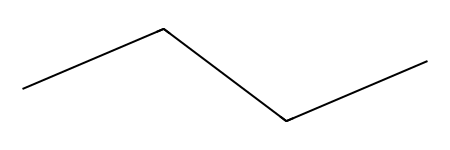

In [3]:
mol

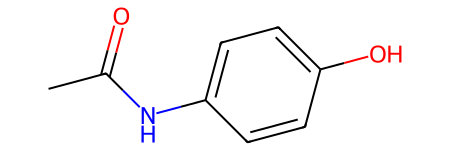

In [4]:
paracetamol = Chem.MolFromSmiles("CC(=O)Nc1ccc(cc1)O")

paracetamol

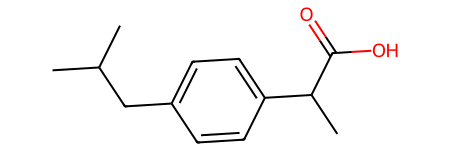

In [5]:
ibuprofen = Chem.MolFromSmiles("CC(Cc1ccc(cc1)C(C(=O)O)C)C")

ibuprofen

We can now calculate properties of these molecules using the Descriptors function

In [6]:
# Molecular weight of paracetamol
print(Descriptors.MolWt(paracetamol))

151.165


In [7]:
# LogP of paracetamol
print(Descriptors.MolLogP(paracetamol))

1.3505999999999998


In [8]:
# Total polar surface area (TPSA) of paracetamol
print(Descriptors.TPSA(paracetamol))

49.33


There is an excellent description of all the molecular descriptors available here:

https://github.com/milanimarcel/Descriptors-from-RDKit

There are over 200 descriptors like this available for a molecule, and the CalcMolDescriptors function can calculate them all at once for a molecule.

In [9]:
## Collecting all of the molecular descriptors for paracetamol
print(rdkit.Chem.Descriptors.CalcMolDescriptors(paracetamol))

{'MaxAbsEStateIndex': 10.524468537414966, 'MaxEStateIndex': 10.524468537414966, 'MinAbsEStateIndex': 0.11510204081632636, 'MinEStateIndex': -0.11510204081632636, 'qed': 0.5950261967780849, 'SPS': 9.181818181818182, 'MolWt': 151.165, 'HeavyAtomMolWt': 142.093, 'ExactMolWt': 151.063328528, 'NumValenceElectrons': 58, 'NumRadicalElectrons': 0, 'MaxPartialCharge': 0.22074743631242583, 'MinPartialCharge': -0.5079643157925783, 'MaxAbsPartialCharge': 0.5079643157925783, 'MinAbsPartialCharge': 0.22074743631242583, 'FpDensityMorgan1': 1.3636363636363635, 'FpDensityMorgan2': 1.9090909090909092, 'FpDensityMorgan3': 2.3636363636363638, 'BCUT2D_MWHI': 16.254688714379633, 'BCUT2D_MWLOW': 10.280190859964737, 'BCUT2D_CHGHI': 1.9280360590359853, 'BCUT2D_CHGLO': -1.9945540738765866, 'BCUT2D_LOGPHI': 2.125247579160176, 'BCUT2D_LOGPLOW': -2.0440113126102855, 'BCUT2D_MRHI': 5.88095478459792, 'BCUT2D_MRLOW': -0.11373578338266148, 'AvgIpc': 1.9291266251851134, 'BalabanJ': 2.7362980721056545, 'BertzCT': 253.29

# Section 1: Unsupervised machine learing of molecules

### We first calculate all the molecular descriptors for our molecules -  we take each SMILE and:

- Convert it to an rdkit molecule
- Extract the molecular descriptors using the CalcMolDescriptors function

I have provided a function that can compute the descriptors for a smiles code below

In [10]:
drug_data = pd.read_excel("Drug_permeability.xlsx")

In [11]:
drug_data.head()

,Drug_ID,Drug_SMILES,Drug_Permeability
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000


In [12]:
# Function to compute descriptors
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Descriptors.CalcMolDescriptors(mol) if mol else None

In [13]:
# Apply the function to the DataFrame
drug_data['Descriptors'] = drug_data['Drug_SMILES'].apply(compute_descriptors)

# Convert descriptor tuples into separate columns
descriptor_names = [desc[0] for desc in Descriptors._descList]
df_descriptors = drug_data['Descriptors'].apply(pd.Series)
df_descriptors.columns = descriptor_names

In [14]:
# Merge with original DataFrame
drug_data = pd.concat([drug_data.drop(columns=['Descriptors']), df_descriptors], axis=1)

drug_data.head()

,Drug_ID,Drug_SMILES,Drug_Permeability,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000,10.180343,10.180343,0.142543,-0.933439,0.509593,20.619048,290.271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000,11.292841,11.292841,0.040533,-0.040533,0.330873,11.333333,245.366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000,10.554213,10.554213,0.080556,-0.538553,0.798144,41.045455,299.370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,creatinine,CN1CC(=O)NC1=N,-5.935409,10.370278,10.370278,0.099537,-0.099537,0.422306,19.375000,113.120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000,11.075595,11.075595,0.113574,-0.908859,0.721043,47.760000,337.463,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have a complete set of descriptors for use in machine learning.

### Task 1: prepare our data for machine learning:

There are a few things we need to do before we can use the for machine learning:

- We need to remove the descriptors where nothing changes (there is no variation across samples) as they will add no information to a model
- Some molecular features will return NaN (not a number) for some molecules. There are different ways to deal with this (eg. imputing them), but in this situation we will just remove molecules with NaN values as there are only 2
- We need to scale the features in the same way as previously - so that the features with a larger range dont dominate the models

In [15]:
# Remove constant columns (where all values are the same)
drug_data = drug_data.loc[:, (drug_data.nunique() > 1).values]

drug_data = drug_data.dropna()

In [16]:
descriptors = drug_data[["Drug_ID", "Drug_SMILES"]]

In [17]:
molecular_features = drug_data.drop(["Drug_ID", "Drug_SMILES"], axis=1)



In [18]:
molecular_features.head()

,Drug_Permeability,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-6.220000,10.180343,10.180343,0.142543,-0.933439,0.509593,20.619048,290.271,276.159,290.079038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.860000,11.292841,11.292841,0.040533,-0.040533,0.330873,11.333333,245.366,222.182,245.177964,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-4.090000,10.554213,10.554213,0.080556,-0.538553,0.798144,41.045455,299.370,278.202,299.152144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-5.935409,10.370278,10.370278,0.099537,-0.099537,0.422306,19.375000,113.120,106.064,113.058912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-4.840000,11.075595,11.075595,0.113574,-0.908859,0.721043,47.760000,337.463,310.247,337.204179,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
molecular_features_scaled = pd.DataFrame(scaler.fit_transform(molecular_features), columns= molecular_features.columns)

In [20]:
molecular_features_scaled.head()

,Drug_Permeability,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.260069,-0.805334,-0.805334,-0.116176,0.267234,0.051358,0.035479,-0.799151,-0.772835,-0.798609,...,-0.066519,-0.198156,-0.319647,-0.100056,-0.074412,-0.100056,-0.150075,-0.164771,-0.264642,-0.200229
1,1.778391,-0.337580,-0.337580,-0.618072,0.888430,-0.784294,-0.855943,-1.086884,-1.144082,-1.086541,...,-0.066519,-0.198156,-0.319647,-0.100056,-0.074412,-0.100056,-0.150075,-0.164771,0.885095,-0.200229
2,1.482269,-0.648139,-0.648139,-0.421158,0.541956,1.400557,1.996401,-0.740848,-0.758784,-0.740427,...,-0.066519,-0.198156,-0.319647,-0.100056,-0.074412,-0.100056,-0.150075,-0.164771,-0.264642,-0.200229
3,-0.893664,-0.725475,-0.725475,-0.327768,0.847380,-0.356773,-0.083948,-1.934265,-1.942727,-1.933765,...,-0.066519,-0.198156,-0.319647,-0.100056,-0.074412,-0.100056,-0.150075,-0.164771,-0.264642,-0.200229
4,0.516657,-0.428922,-0.428922,-0.258705,0.284335,1.040049,2.640993,-0.496763,-0.538383,-0.496415,...,-0.066519,-0.198156,-0.319647,-0.100056,13.438750,-0.100056,-0.150075,-0.164771,-0.264642,-0.200229


## Once we have our descriptors without any NaN values, scaled, and with the unchanging features removed we are ready to apply PCA:

### Task 2: Apply PCA to your dataframe and plot it.

##### Subtask - use the hue parameter to colour the samples by permeability values - what do you see?

In [21]:
## We can next perform principal component analysis on these molecular descriptors
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(molecular_features_scaled)

drug_data["PCA1"] = pca_result[:, 0]
drug_data["PCA2"] = pca_result[:, 1]

In [22]:
drug_data.head()

,Drug_ID,Drug_SMILES,Drug_Permeability,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,PCA1,PCA2
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000,10.180343,10.180343,0.142543,-0.933439,0.509593,20.619048,290.271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.566929,4.225531
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000,11.292841,11.292841,0.040533,-0.040533,0.330873,11.333333,245.366,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-7.694797,1.316468
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000,10.554213,10.554213,0.080556,-0.538553,0.798144,41.045455,299.370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.967074,2.710952
3,creatinine,CN1CC(=O)NC1=N,-5.935409,10.370278,10.370278,0.099537,-0.099537,0.422306,19.375000,113.120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-11.250852,3.549180
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000,11.075595,11.075595,0.113574,-0.908859,0.721043,47.760000,337.463,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.169757,3.226896


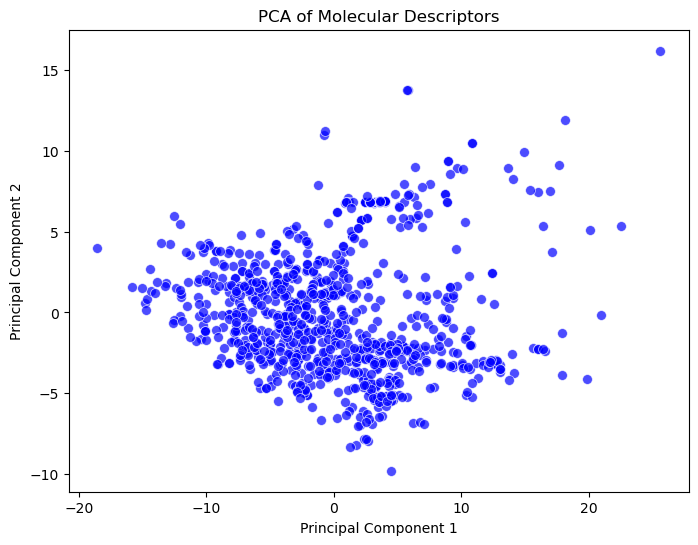

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=drug_data["PCA1"], y=drug_data["PCA2"], color = "blue", alpha = 0.7, s = 50, edgecolor = "w")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Molecular Descriptors")
plt.show()

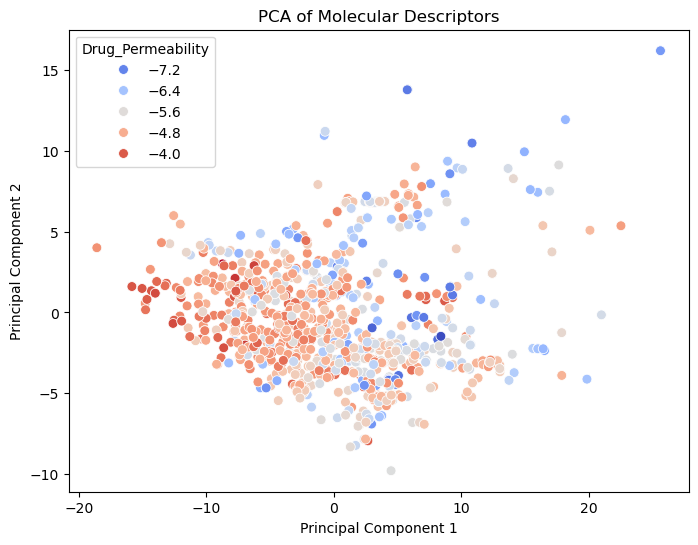

In [24]:
# Visualize PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=drug_data["PCA1"], y=drug_data["PCA2"], hue = drug_data["Drug_Permeability"], alpha = 1, s = 50, edgecolor = "w"
               ,palette = "coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Molecular Descriptors")
plt.show()

In [25]:
def has_benzene(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    benzene = Chem.MolFromSmarts("c1ccccc1")
    return mol.HasSubstructMatch(benzene)


drug_data["HasBenzene"] = drug_data["Drug_SMILES"].apply(has_benzene)

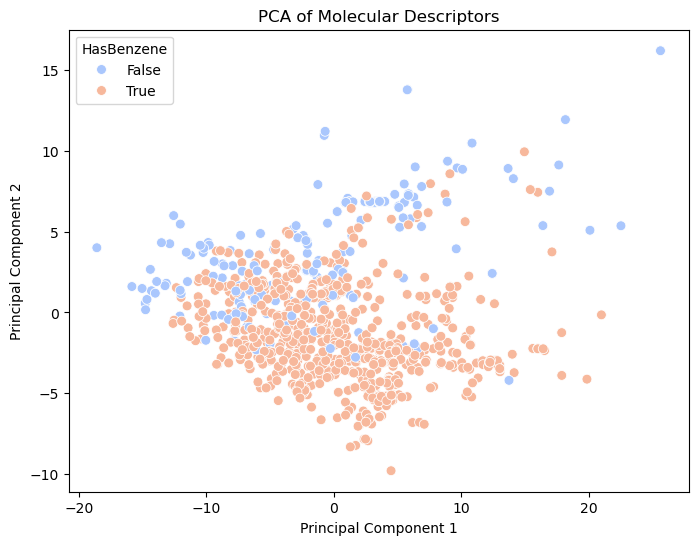

In [26]:
# Visualize PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=drug_data["PCA1"], y=drug_data["PCA2"], hue = drug_data["HasBenzene"], alpha = 1, s = 50, edgecolor = "w"
               ,palette = "coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Molecular Descriptors")
plt.show()

# Section 2: Supervised machine learning of molecules

## In this section I will introduce how to perform supervised machine learning of molecular descriptors.

I will include a new way of training a model - the concept is that when you train a model there are multiple ways you can adjust a model to be "better". For random forests for example you can change:

- The number of trees
- How deep the trees go
- The number of samples required to be in each side of a "split" in the tree

These can have large numbers of combinations, and so trying them all manually can take a huge amount of time. The way we solve this is to automatically test different combinations of parameters and then choose the best one - this is called __"hyperparameter tuning"__. https://www.geeksforgeeks.org/hyperparameter-tuning/ 

This is a huge field of research in machine learning - particularly as hyperparameter tuning of neural networks is one of the limitations holding back back large language models (LLMs).

Luckily for small molecules this can all be done in one line of code, and can be done _at the same time_ as cross validation.

There are multiple ways to do this - you can try all possible combinations of hyperparameters(grid search) but this can take a long time when you have a lot of potential combinations. We will use _random search_ in which random sets of parameters are chosen and the best is returned.

In [27]:
## Load the relevant modules
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [28]:
## We split our data into X and y - we are using the same dataframes as in the previous section
X = molecular_features.drop("Drug_Permeability", axis =1)
y = molecular_features["Drug_Permeability"].values

In [29]:
## We generate our training and testing X and y, then scale them so they are appropriate for ML

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
## Define parameter grid for hyperparameter tuning - this is the different levels of parameters for the model that will be tested.
param_grid = {
    'n_estimators': [100, 200, 400, 1000],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Perform random search for hyperparameter tuning:

# Load the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Set up a random search
random_search = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', n_iter = 20)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 1000]},
                   scoring='neg_mean_absolute_error')

In [31]:
# Best model after tuning - this is the model with the lowest error of the combinations of parameters tested
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}


In [32]:
## We can generate our accuract scores in a similar way to before, this time doing just a train/test split:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Train MAE: {train_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")

Train MAE: 0.115
Test MAE: 0.315


/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_33145/4115559121.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Train MAE", "Test MAE"], y=[train_mae, test_mae], palette='Blues')


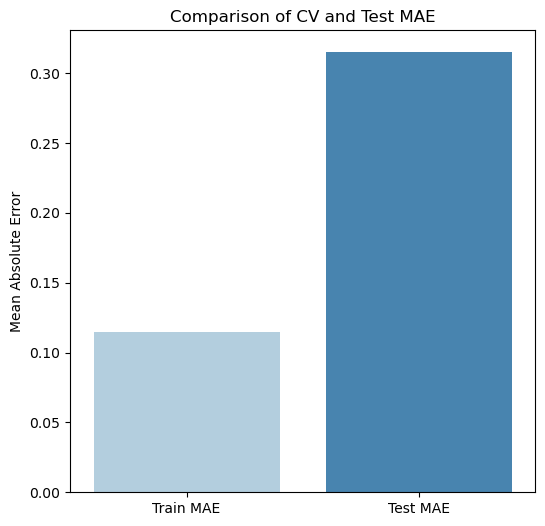

In [33]:
cv_mae = -np.mean(random_search.cv_results_["mean_test_score"])

# MAE Bar Chart with CV and Test MAE
plt.figure(figsize=(6,6))
sns.barplot(x=["Train MAE", "Test MAE"], y=[train_mae, test_mae], palette='Blues')
plt.ylabel("Mean Absolute Error")
plt.title("Comparison of CV and Test MAE")
plt.show()

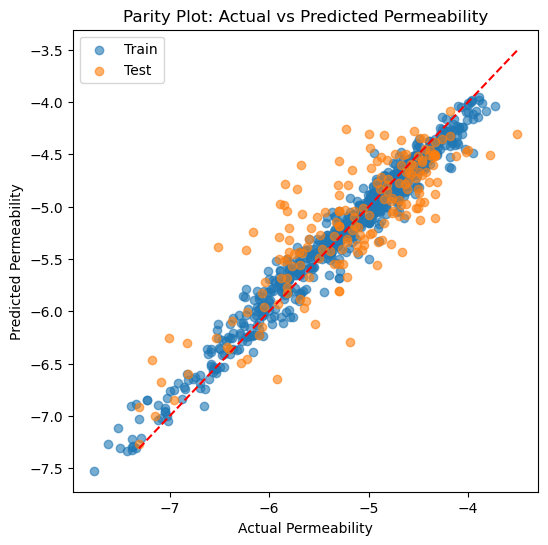

In [34]:
# --- Parity Plot ---
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, label="Train", alpha=0.6)
plt.scatter(y_test, y_test_pred, label="Test", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Permeability")
plt.ylabel("Predicted Permeability")
plt.title("Parity Plot: Actual vs Predicted Permeability")
plt.legend()
plt.show()

## Question - why is the test error so much worse than the training error?

Another new thing we can do is __model interpretation__ - this is where we see which of our features the model is using to make its decisions. This is performed using Shapely analysis - or SHAP. https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [36]:
## We install SHAP
%pip install shap

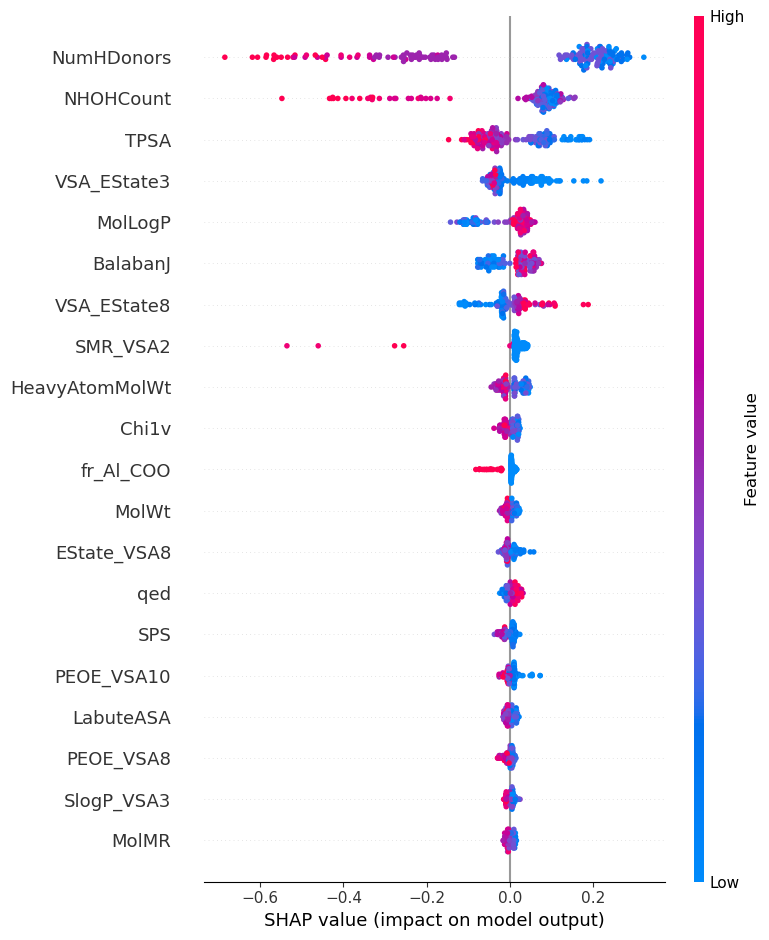

In [35]:
import shap

# We generate an "explainer" for our best model
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names = X.columns)


Features with "broad" SHAP values are very important for the predictive power of the model, and each dot in this plot represents a single sample and how much that parameter influenced the prediction of the model on it. Dots spreading to the right mean they increase the permeability value, and dots to the left decrease it.

## Question -  Do these results make sense?

 Our model is very overfit - one way we can try and reduce this is to remove features that are highly correlated to each other, and use PCA to reduce the number of features even further

#### Below is an attempt to reduce overfitting by removing features that are highly correlated with each other, then applying PCA to the remaining features to reduce them down to the minimum needed to retin 95% of the variation in the data. We then use a different type of random forest model called a HistGradientBooster model, which can potentially reduce overfitting.

In [37]:
# Identify and Remove Highly Correlated Features
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Removing highly correlated features: {highly_correlated_features}")
X = X.drop(columns=highly_correlated_features)
X_column = list(X.columns)

Removing highly correlated features: ['MaxEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'Kappa1', 'Kappa2', 'LabuteASA', 'SlogP_VSA6', 'VSA_EState10', 'HeavyAtomCount', 'NOCount', 'NumHDonors', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'MolMR', 'fr_Al_OH_noTert', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_Nhpyrrole', 'fr_amide', 'fr_benzene', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_ester']


In [38]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Automatically choose number of components to retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
# Load and set up a different type of random forest model
from sklearn.ensemble import HistGradientBoostingRegressor

# Define parameter grid for HistGradientBoostingRegressor
param_grid= {
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_leaf': [10, 20, 30],
    'early_stopping': [True],
    'tol': [1e-4, 1e-3]
}

# Perform random search for hyperparameter tuning
rf = HistGradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', n_iter = 20)
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'early_stopping': [True],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 10],
                                        'max_iter': [100, 200, 300],
                                        'min_samples_leaf': [10, 20, 30],
                                        'tol': [0.0001, 0.001]},
                   scoring='neg_mean_absolute_error')

In [40]:
# Best model after tuning
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'tol': 0.0001, 'min_samples_leaf': 10, 'max_iter': 100, 'max_depth': 5, 'learning_rate': 0.1, 'early_stopping': True}


In [41]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Train MAE: {train_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")

Train MAE: 0.166
Test MAE: 0.322


/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_33145/1591788570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Train MAE", "Test MAE"], y=[train_mae, test_mae], palette='Blues')


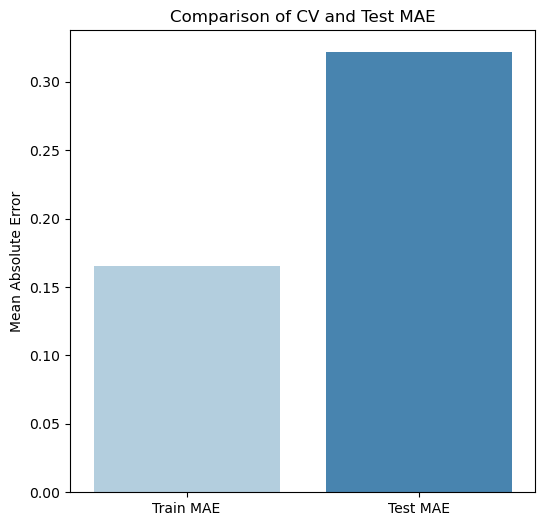

In [43]:
cv_mae = -np.mean(random_search.cv_results_["mean_test_score"])

# --- MAE Bar Chart with CV and Test MAE ---
plt.figure(figsize=(6,6))
sns.barplot(x=["Train MAE", "Test MAE"], y=[train_mae, test_mae], palette='Blues')
plt.ylabel("Mean Absolute Error")
plt.title("Comparison of CV and Test MAE")
plt.show()

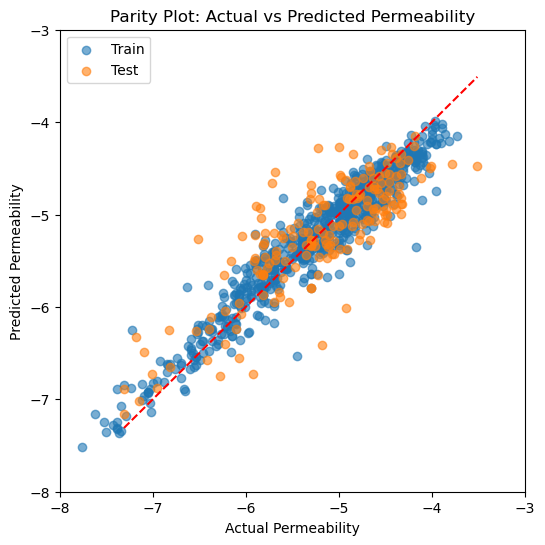

In [44]:
# --- Parity Plot ---
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, label="Train", alpha=0.6)
plt.scatter(y_test, y_test_pred, label="Test", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlim(-8, -3)
plt.ylim(-8, -3)
plt.xlabel("Actual Permeability")
plt.ylabel("Predicted Permeability")
plt.title("Parity Plot: Actual vs Predicted Permeability")
plt.legend()
plt.show()

### Whilst our model is still overfit, we have managed to reduce this (the difference between Train and Test MAEs is smaller) through the methods we used above. Reducing overfitting is called "regularisation" and is a key method in small scale datasets like those in pharmaceutics

## Section 3: Using molecular fingerprints

We now want to use a different method of representing our molecules to see if this improves our model at all.

The following code shows you how to compute the morgan fingerprint for our molecules, and produce a dataframe containing our permeability values followed by 2048 features representing the fingerprint of the molecule. 

### Task 3: Fit a model to this data, using cross validation and hyperparmameter tuning, see how accurate you can get it on the external test set - the best score I managed is: CV - 0.41, Test - 0.43

In [45]:
drug_data = pd.read_excel("Drug_permeability.xlsx")

In [46]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

# Function to compute descriptors
def compute_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = GetMorganFingerprintAsBitVect(mol, radius =2, nBits=2048)
    arr = np.zeros((1, 2048), dtype=int)
    DataStructs.ConvertToNumpyArray(fp, arr[0])
    return arr[0]

In [47]:
fingerprints = np.array(drug_data["Drug_SMILES"].apply(compute_morgan_fingerprint).tolist())
fingerprint_columns = [f"FP_{i}" for i in range(fingerprints.shape[1])]
fp_df = pd.DataFrame(fingerprints, columns=fingerprint_columns)
morgan_fingerprint = pd.concat([drug_data, fp_df], axis=1)

In [48]:
morgan_fingerprint

,Drug_ID,Drug_SMILES,Drug_Permeability,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,...,FP_2038,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,creatinine,CN1CC(=O)NC1=N,-5.935409,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,Capric acid (decanoic acid),CCCCCCCCCC(=O)O,-4.680000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,Apometzgerin (2),COc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc(O)c1OC,-4.950000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
907,3,COC(=O)C[C@@H](C(=O)NN(Cc1ccc(/C=C\c2ccccc2)cc...,-5.080000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908,51d,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=...,-5.300000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = fp_df
y = morgan_fingerprint["Drug_Permeability"].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [51]:
# --- Scale Features (Only on Training Data) ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# --- Perform PCA for Feature Reduction to Retain 95% Variance ---
pca = PCA(n_components=0.95)  # Automatically choose number of components to retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [57]:
# Define parameter grid for HistGradientBoostingRegressor with Early Stopping
param_dist = {
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_leaf': [10, 20, 30],
    'early_stopping': [True],
    'tol': [1e-4, 1e-3]
}

# Perform RandomizedSearchCV for hyperparameter tuning
hgb = HistGradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(hgb, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train_pca, y_train)

/Users/davidshorthouse/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'early_stopping': [True],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 10],
                                        'max_iter': [100, 200, 300],
                                        'min_samples_leaf': [10, 20, 30],
                                        'tol': [0.0001, 0.001]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [58]:
# Best model after tuning
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

# --- Model Evaluation ---
y_train_pred = best_model.predict(X_train_pca)
y_test_pred = best_model.predict(X_test_pca)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
cv_mae = -np.mean(random_search.cv_results_["mean_test_score"])

Best Parameters: {'tol': 0.0001, 'min_samples_leaf': 10, 'max_iter': 300, 'max_depth': 5, 'learning_rate': 0.1, 'early_stopping': True}


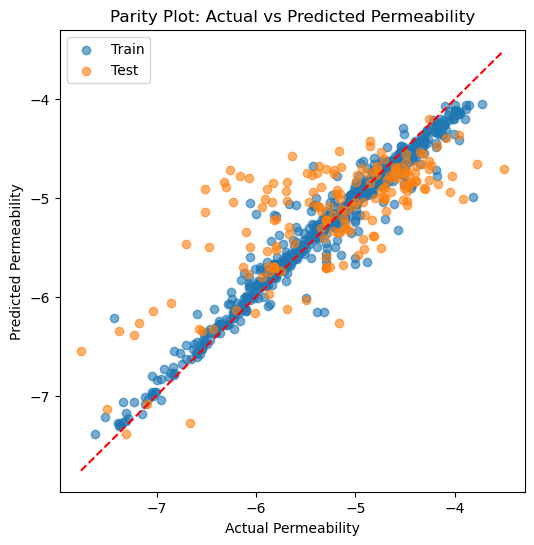

In [59]:
# --- Parity Plot ---
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, label="Train", alpha=0.6)
plt.scatter(y_test, y_test_pred, label="Test", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Permeability")
plt.ylabel("Predicted Permeability")
plt.title("Parity Plot: Actual vs Predicted Permeability")
plt.legend()
plt.show()

/var/folders/vv/0521912d5_j4wpw2lwprbrzw0000gn/T/ipykernel_33145/3440313590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["CV MAE", "Test MAE"], y=[cv_mae, test_mae], palette='Blues')


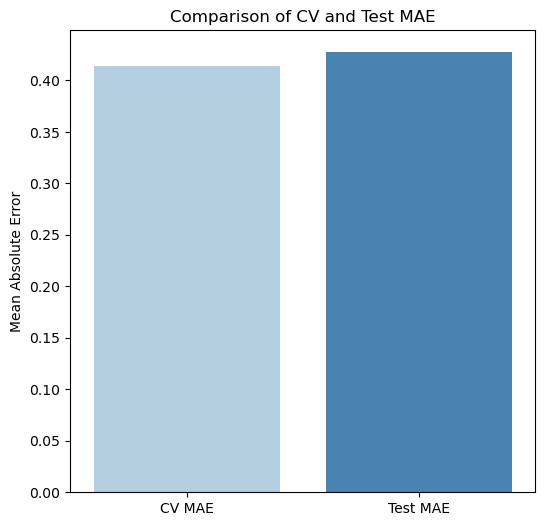

In [60]:
# --- MAE Bar Chart with CV and Test MAE ---
plt.figure(figsize=(6,6))
sns.barplot(x=["CV MAE", "Test MAE"], y=[cv_mae, test_mae], palette='Blues')
plt.ylabel("Mean Absolute Error")
plt.title("Comparison of CV and Test MAE")
plt.show()

In [64]:
print(f"CV MAE: {cv_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")

CV MAE: 0.414
Test MAE: 0.427


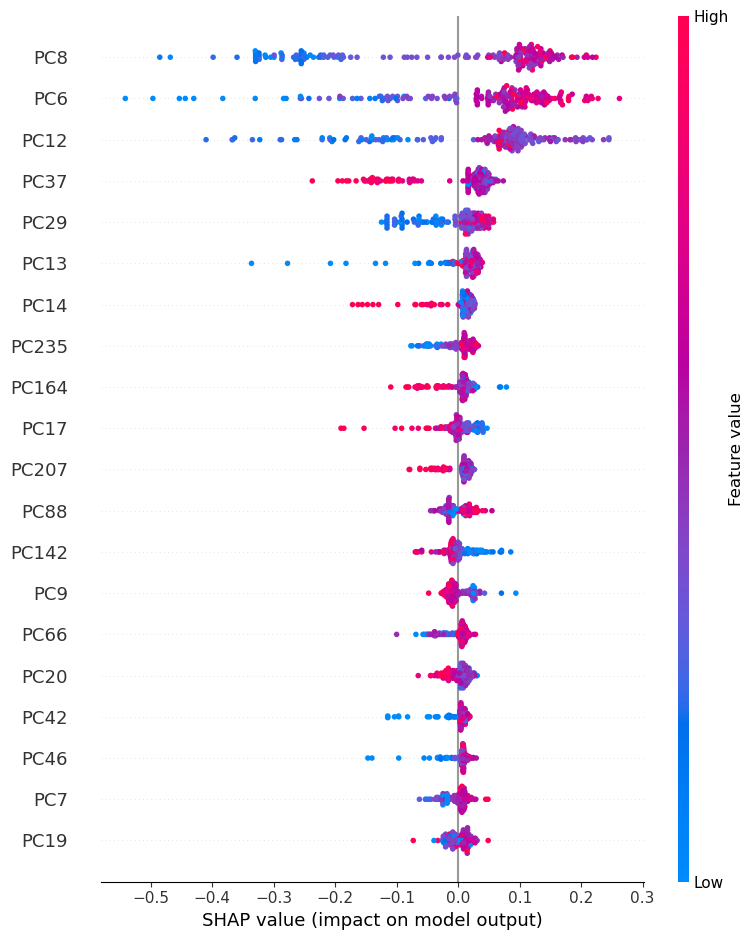

In [65]:
# --- SHAP Interpretation ---
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test_pca)
shap.summary_plot(shap_values, X_test_pca, feature_names=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])


### Question: You should find that this model is less overfit (the CV and Test scores are more similar). Which model would you choose in the future to predict the permeability of molecules?